In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("worldometer_coronavirus_daily_data.csv")
df2 = pd.read_csv("worldometer_coronavirus_summary_data.csv")

In [3]:
print(df.shape)
print(df2.shape)

(184787, 7)
(226, 12)


In [4]:
df.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [5]:
df2.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277


In [6]:
df3=df2.groupby(['continent']).sum()

In [7]:
df3.head()

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
continent,,,,,,,,,,
Africa,12042400,254319.0,10137200.0,497766.0,966.0,1894093,17982.0,1.021264e+08,10540422.0,1400358940
Asia,149999659,1427939.0,126145273.0,3260318.0,11768.0,5316204,31429.0,2.117785e+09,81570774.0,4672455975
Australia/Oceania,7942867,11413.0,7403813.0,455469.0,162.0,1862950,6467.0,7.960052e+07,15975715.0,43505620
Europe,194330079,1830655.0,170861871.0,5841832.0,8050.0,15377171,113334.0,2.675603e+09,201007918.0,748470690
North America,99625662,1467234.0,94818163.0,3329149.0,7460.0,7011745,51579.0,1.137409e+09,90468341.0,597707388


Total de novos casos por dia:

<AxesSubplot:xlabel='date'>

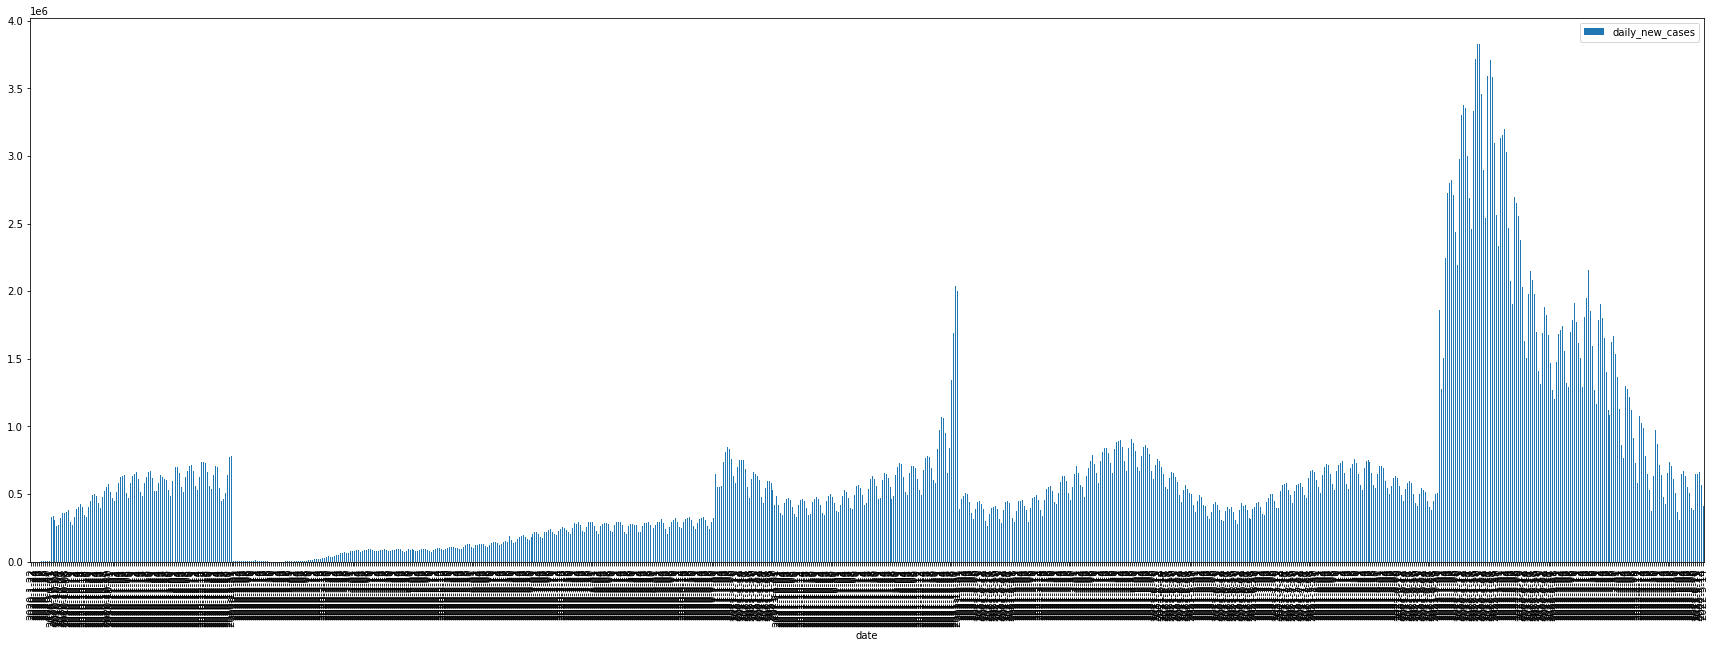

In [8]:
df4_date=df.groupby(['date']).sum()
df4_date.plot(kind="bar", y="daily_new_cases",figsize=(30,10))

Comparação por Continente:
Mortes:

<AxesSubplot:xlabel='continent'>

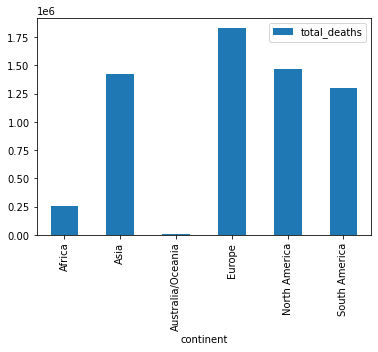

In [9]:
df3.plot(kind="bar", y="total_deaths")

Recuperados:

<AxesSubplot:xlabel='continent'>

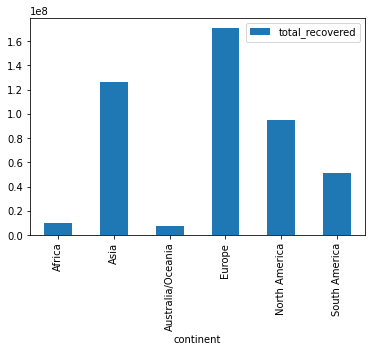

In [10]:
df3.plot(kind="bar", y="total_recovered")

Casos Confirmados:

<AxesSubplot:xlabel='continent'>

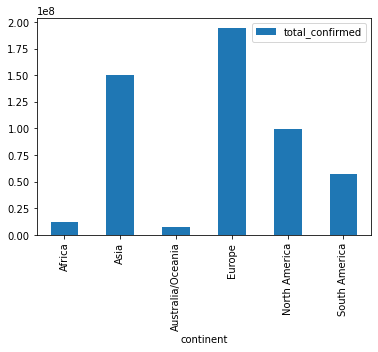

In [11]:
df3.plot(kind="bar", y="total_confirmed")

Média, casos por 1 milhão:

<AxesSubplot:xlabel='continent'>

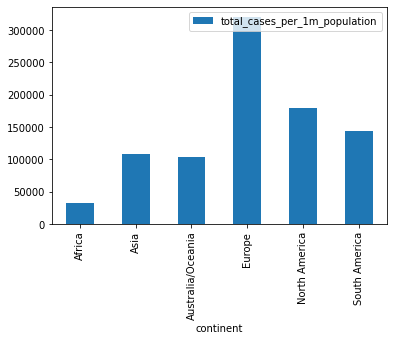

In [12]:
df3_media=df2.groupby(['continent']).mean()
df3_media.plot(kind="bar", y="total_cases_per_1m_population")

In [13]:
df4=df.groupby(['country']).mean()

<AxesSubplot:xlabel='country'>

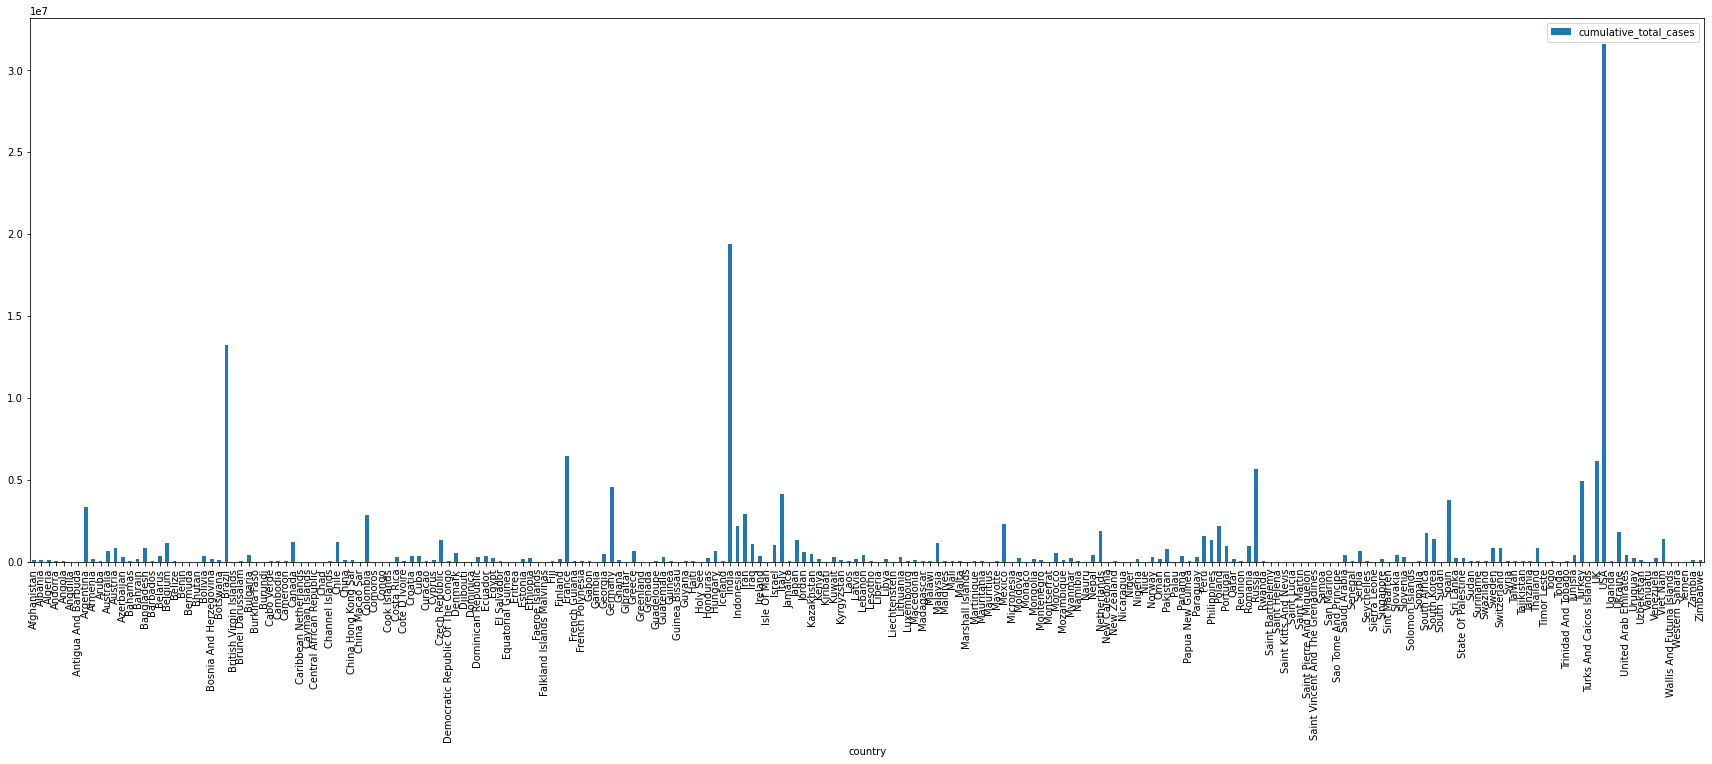

In [14]:
df4.plot(kind="bar", y="cumulative_total_cases",figsize=(30,10))

In [15]:
from sklearn import preprocessing
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder

In [16]:
#preparando e executando Kmeans:
df2_data = df2.iloc[:, :].values

In [17]:
lenc = LabelEncoder()

In [18]:
for i in range (0,2):
  df2_data[:,i] = lenc.fit_transform(df2_data[:,i])

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy='constant',fill_value=0)),
                         ])

In [20]:
df2_data = num_pipeline.fit_transform(df2_data)

In [21]:
kmeans_df2_data = KMeans(n_clusters = 5, random_state=0)
predicao = kmeans_df2_data.fit_predict(df2_data)

In [22]:
centroid_covid = kmeans_df2_data.cluster_centers_
centroid_covid

array([[1.11900498e+02, 2.03980100e+00, 8.53576866e+05, 9.87833333e+03,
        6.18466687e+05, 2.42620149e+04, 5.10348259e+01, 1.50270607e+05,
        1.10383582e+03, 7.36766364e+06, 1.68482149e+06, 1.07564810e+07],
       [6.80000000e+01, 1.00000000e+00, 2.16717015e+07, 2.64711500e+05,
        2.13950735e+07, 1.19165000e+04, 5.40500000e+02, 1.54200000e+04,
        1.88500000e+02, 5.01918457e+08, 3.55821000e+05, 1.42229840e+09],
       [2.12000000e+02, 4.00000000e+00, 8.42094730e+07, 1.02664600e+06,
        8.12442600e+07, 1.93856700e+06, 1.94100000e+03, 2.51659000e+05,
        3.06800000e+03, 1.01688250e+09, 3.03893900e+06, 3.34617623e+08],
       [1.46875000e+02, 2.50000000e+00, 1.48667549e+07, 1.36477250e+05,
        1.43622000e+07, 3.68077625e+05, 7.00125000e+02, 2.70289625e+05,
        1.97425000e+03, 2.82225647e+08, 8.14975075e+06, 6.15590922e+07],
       [1.00714286e+02, 1.35714286e+00, 7.35866336e+06, 1.18189357e+05,
        6.93955871e+06, 3.00915286e+05, 1.44242857e+03, 5.95

In [23]:
import plotly.express as px
import plotly.graph_objects as go 

In [24]:
grafico_predicao = px.scatter(x = df2_data[:,1], y = df2_data[:,2], color=predicao)
grafico_cluster1 = px.scatter(x = centroid_covid[:,1], y = centroid_covid[:,2], size=[10, 10,10,10,10 ])
grafico_cluster_final = go.Figure(data = grafico_predicao.data + grafico_cluster1.data)

grafico_cluster_final.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Comparação por continentes

In [25]:
query_NorthAmerica= df2.loc[df2['continent'] == 'North America' ]

In [26]:
listnorthamerica=query_NorthAmerica.iloc[:, [0]].values

In [27]:
a=listnorthamerica.tolist()


In [28]:
query_NorthAmerica

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
5,Anguilla,North America,2984,9.0,2916.0,59.0,4.0,195646,590.0,5.138200e+04,3368870.0,15252
6,Antigua And Barbuda,North America,7721,137.0,7511.0,73.0,1.0,77646,1378.0,1.890100e+04,190076.0,99439
9,Aruba,North America,35693,213.0,35199.0,281.0,NaN,331689,1979.0,1.778850e+05,1653053.0,107610
13,Bahamas,North America,33871,801.0,32488.0,582.0,NaN,84626,2001.0,2.334730e+05,583330.0,400242
16,Barbados,North America,76261,433.0,71497.0,4331.0,NaN,264768,1503.0,6.694210e+05,2324136.0,288030
19,Belize,North America,57896,676.0,56761.0,459.0,6.0,140843,1644.0,5.492170e+05,1336070.0,411069
21,Bermuda,North America,14135,135.0,13664.0,336.0,NaN,228537,2183.0,8.939800e+05,14454002.0,61850
27,British Virgin Islands,North America,6573,62.0,NaN,NaN,1.0,214762,2026.0,1.036370e+05,3386166.0,30606
35,Canada,North America,3821346,40228.0,3499564.0,281554.0,423.0,99622,1049.0,6.143646e+07,1601640.0,38358465
36,Caribbean Netherlands,North America,9915,35.0,9829.0,51.0,NaN,371668,1312.0,3.012600e+04,1129287.0,26677


In [ ]:
northamericalistdate= df.filter(items=a)

TypeError: ignored

In [29]:
query_Brazil= df.loc[df['country'] == 'Brazil']

Novos casos no Brasil por dia

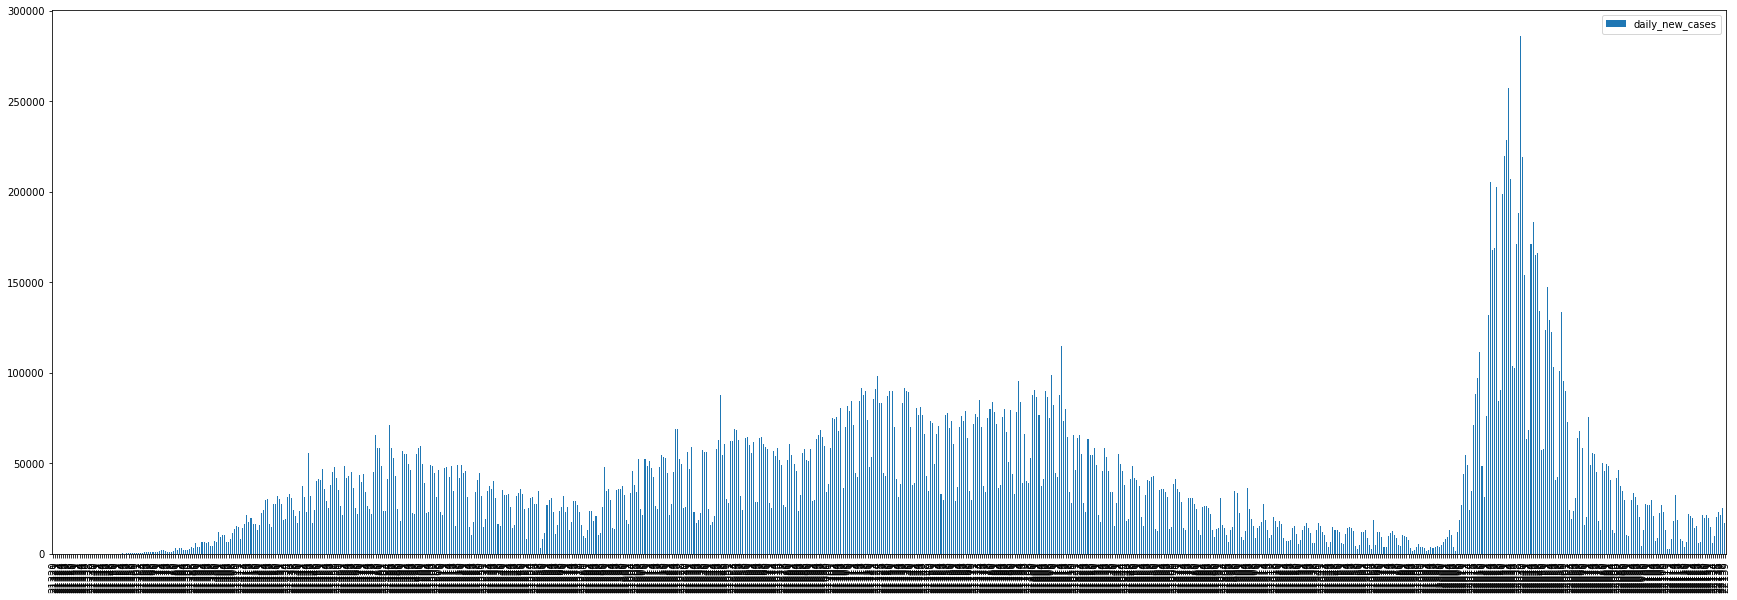

In [ ]:
query_Brazil.plot(kind="bar", y="daily_new_cases",figsize=(30,10))